In [1]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split 
import pandas as pd 
from pandas.plotting import scatter_matrix
import numpy as np
%matplotlib inline

In [2]:
# import the data for regression 
df = pd.read_csv('dataset/abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

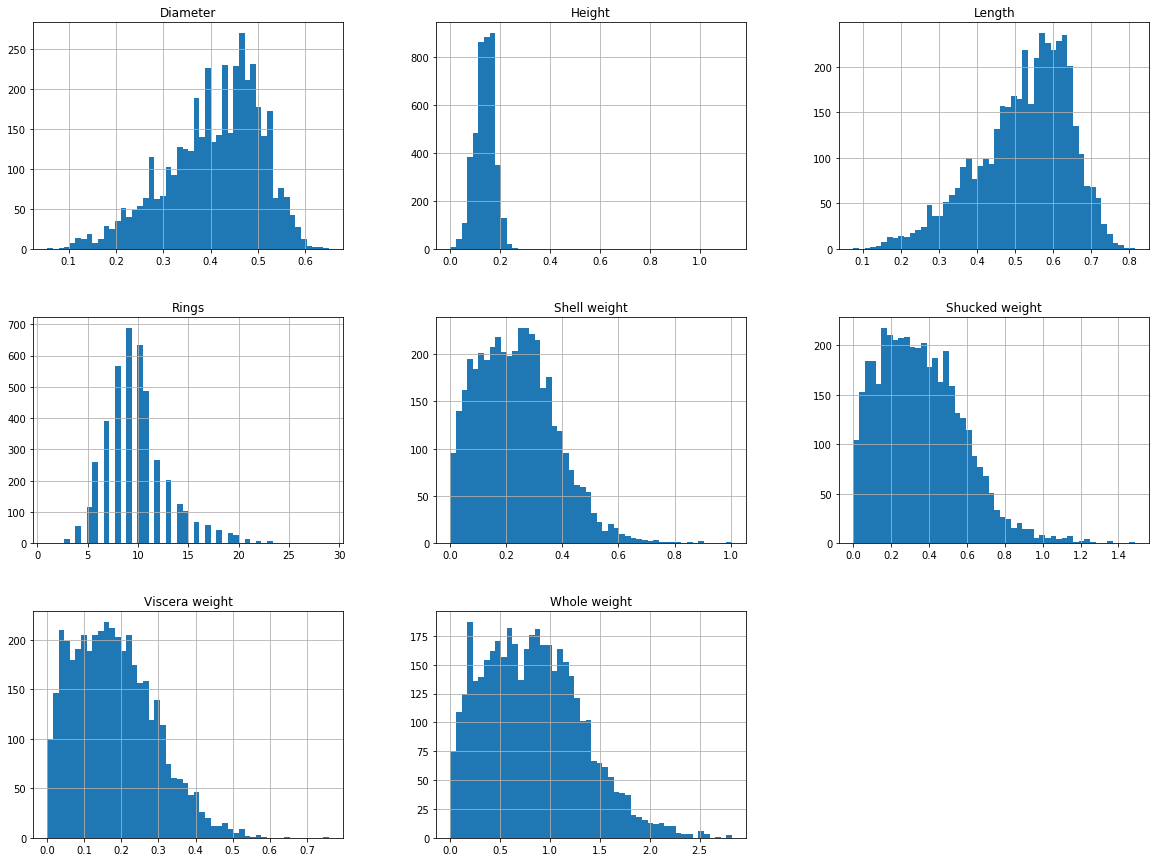

In [6]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [7]:
# Find the r value aka standard correlation coefficient 
corr_matrix = df.corr()
corr_matrix['Rings']

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E59FC4EB8>,
      dtype=object)

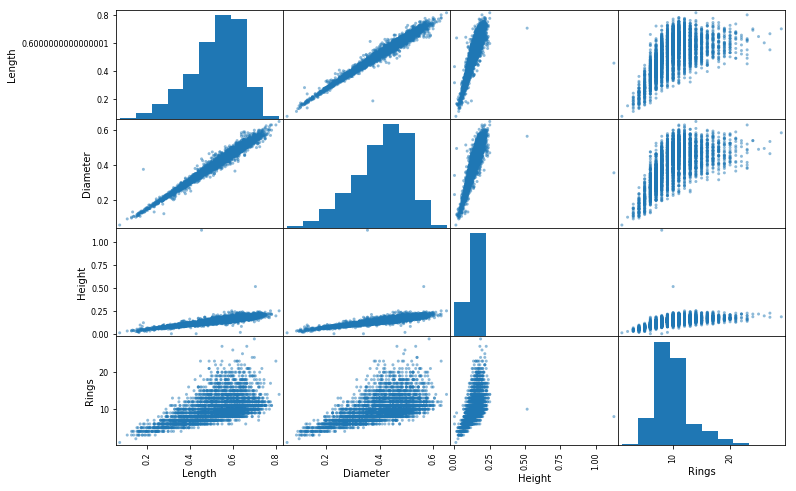

In [8]:
attributes = ['Length', 'Diameter', 'Height', 'Rings']
scatter_matrix(df[attributes], figsize=(12, 8))

In [9]:
# convert text labels to integer labels
sex_label = LabelEncoder()
df['Sex'] = sex_label.fit_transform(df['Sex'])
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [10]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [11]:
# define the features and the labels
X = df.drop(['Rings', 'Sex'], axis=1)

# separate the # of rings into three bins 
bin = [0, 8, 10, np.inf]
label = [0, 1, 2]
y = pd.cut(df['Rings'], bins=bin,labels=label)

# divide data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

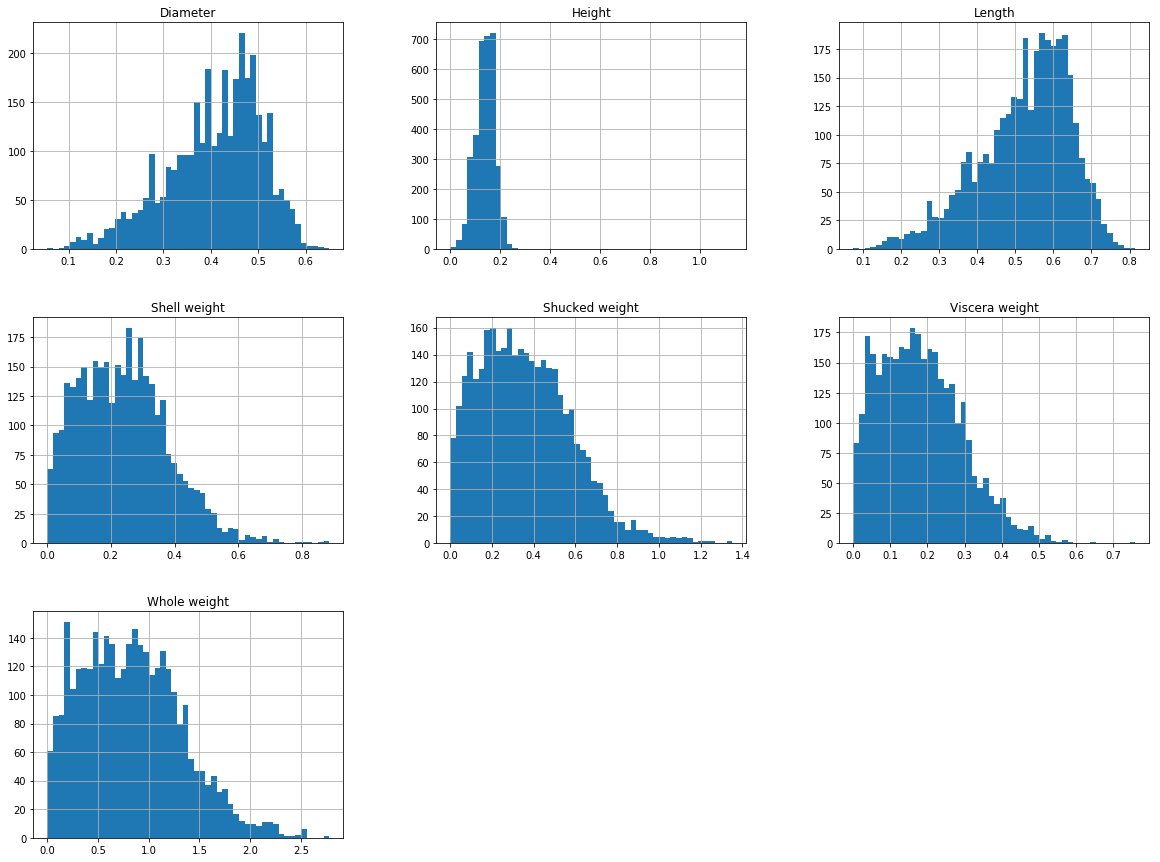

In [12]:
X_train.hist(bins=50, figsize=(20, 15))
plt.show()

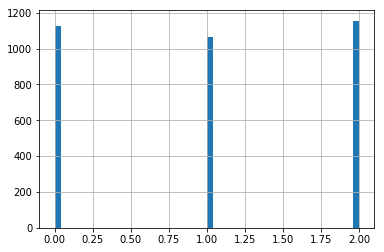

In [13]:
y_train.hist(bins=50)
plt.show()

In [14]:
# scales the data 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [15]:
# finding the optimal number of estimators
def find_optimal_estimators(start_value, decrement):
    optimal_list = [] 
    while start_value >= decrement:
        clf = RandomForestClassifier(n_estimators=start_value, random_state=10)
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        acc = accuracy_score(predictions, y_test)
        if not optimal_list:
            optimal_list.append([start_value, acc])
        elif acc > optimal_list[0][1]:
            optimal_list.clear()
            optimal_list.append([start_value, acc])
        else:
            pass
        print(f'Testing: {start_value} acc: {acc} current best number: {optimal_list[0][0]}')
        start_value -= decrement
    return optimal_list 

In [23]:
find_optimal_estimators(400, 10)

Testing: 400 acc: 0.6327751196172249 current best number: 400
Testing: 390 acc: 0.6375598086124402 current best number: 390
Testing: 380 acc: 0.6375598086124402 current best number: 390
Testing: 370 acc: 0.6363636363636364 current best number: 390
Testing: 360 acc: 0.6363636363636364 current best number: 390
Testing: 350 acc: 0.6363636363636364 current best number: 390
Testing: 340 acc: 0.6327751196172249 current best number: 390
Testing: 330 acc: 0.6351674641148325 current best number: 390
Testing: 320 acc: 0.6339712918660287 current best number: 390
Testing: 310 acc: 0.6327751196172249 current best number: 390
Testing: 300 acc: 0.631578947368421 current best number: 390
Testing: 290 acc: 0.6327751196172249 current best number: 390
Testing: 280 acc: 0.6327751196172249 current best number: 390
Testing: 270 acc: 0.6327751196172249 current best number: 390
Testing: 260 acc: 0.6339712918660287 current best number: 390
Testing: 250 acc: 0.6327751196172249 current best number: 390
Testing: 

[[390, 0.6375598086124402]]

In [24]:
# compare different kernels for a support vector regression
def compare_kernels():
    kernels = ['rbf', 'linear', 'sigmoid', 'poly']
    for i in kernels:
        clf = SVC(kernel=i, gamma='scale')
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        acc = accuracy_score(pred, y_test)
        print(f'Kernel: {i} accuracy: {acc}')

In [25]:
compare_kernels()

Kernel: rbf accuracy: 0.6411483253588517
Kernel: linear accuracy: 0.65311004784689
Kernel: sigmoid accuracy: 0.5167464114832536
Kernel: poly accuracy: 0.5287081339712919


In [26]:
# find the best number of neigbors
def find_neighbors(lim, decrement):
    while lim >= 1:
        knn_clf = KNeighborsClassifier(n_neighbors=lim)
        knn_clf.fit(X_train, y_train)
        knn_pred = knn_clf.predict(X_test)
        acc = accuracy_score(y_test, knn_pred)
        print(f'KNN number of neigbors: {lim} accuracy: {acc}')
        lim -= decrement

In [27]:
find_neighbors(20, 1)

KNN number of neigbors: 20 accuracy: 0.631578947368421
KNN number of neigbors: 19 accuracy: 0.6375598086124402
KNN number of neigbors: 18 accuracy: 0.6291866028708134
KNN number of neigbors: 17 accuracy: 0.6375598086124402
KNN number of neigbors: 16 accuracy: 0.6267942583732058
KNN number of neigbors: 15 accuracy: 0.6267942583732058
KNN number of neigbors: 14 accuracy: 0.6220095693779905
KNN number of neigbors: 13 accuracy: 0.6160287081339713
KNN number of neigbors: 12 accuracy: 0.6136363636363636
KNN number of neigbors: 11 accuracy: 0.6172248803827751
KNN number of neigbors: 10 accuracy: 0.6232057416267942
KNN number of neigbors: 9 accuracy: 0.6232057416267942
KNN number of neigbors: 8 accuracy: 0.6148325358851675
KNN number of neigbors: 7 accuracy: 0.5992822966507177
KNN number of neigbors: 6 accuracy: 0.5980861244019139
KNN number of neigbors: 5 accuracy: 0.604066985645933
KNN number of neigbors: 4 accuracy: 0.5849282296650717
KNN number of neigbors: 3 accuracy: 0.5765550239234449
K